## Data preprocessing

### 0. Loading dependencies

In [3]:
!pip install gdown numpy pandas scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [ ]:
import gdown
import pandas as pd

# 구글 드라이브 파일의 공유 가능한 링크
google_drive_url_1 = 'https://drive.google.com/uc?id=1CfhTUo9TSYnOokSKj5nKcaHbrbDNPh1L'
google_drive_url_2 = 'https://drive.google.com/uc?id=1QIzQnCh63IaWIgtrbu_-kPwSeTEp78rM'

# 파일을 다운로드 받을 경로 및 파일명
output_path_1 = './mon_standard.pkl'
output_path_2 = './unmon_standard.pkl'

# gdown을 사용하여 구글 드라이브 파일 다운로드
gdown.download(google_drive_url_1, output_path_1, quiet=False)
gdown.download(google_drive_url_2, output_path_2, quiet=False)


In [5]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 1. import data

### 1-1. import monitered data

In [6]:
USE_SUBLABEL = False
URL_PER_SITE = 10
TOTAL_URLS   = 950

# Load the pickle file
print("Loading datafile...")
with open("./mon_standard.pkl", 'rb') as fi: #local version
# with open("/content/drive/MyDrive/기학/Numpie/Preprocessing/pkl/mon_standard.pkl", 'rb') as fi: # Path to mon_standard.pkl in Colab
    data = pickle.load(fi)

X1_1 = [] # Array to store instances (timestamps) - 19,000 instances, e.g., [[0.0, 0.5, 3.4, ...], [0.0, 4.5, ...], [0.0, 1.5, ...], ... [... ,45.8]]
X2_1 = [] # Array to store instances (direction*size) - size information
y = [] # Array to store the site of each instance - 19,000 instances, e.g., [0, 0, 0, 0, 0, 0, ..., 94, 94, 94, 94, 94]

# Differentiate instances and sites, and store them in the respective x and y arrays
# x array (direction*timestamp), y array (site label)
for i in range(TOTAL_URLS):
    if USE_SUBLABEL:
        label = i
    else:
        label = i // URL_PER_SITE # Calculate which site's URL the current URL being processed belongs to and set that value as the label. Thus, URLs fetched from the same site are labeled identically.
    for sample in data[i]:
        size_seq = []
        time_seq = []
        for c in sample:
            dr = 1 if c > 0 else -1
            time_seq.append(abs(c))
            size_seq.append(dr * 512)
        X1_1.append(time_seq)
        X2_1.append(size_seq)
        y.append(label)
size = len(y)

print(f'Total samples: {size}') # Output: 19000


Loading datafile...
Total samples: 19000


### 1-2. make monitered data to dataFrame

In [7]:
X1_labels = pd.DataFrame({'time_stamp': X1_1, 'packet_size': X2_1})
y1_labels = pd.DataFrame({'web_site': y})

In [8]:
X1_labels

,time_stamp,packet_size
0,"[0.0, 0.14, 0.14, 0.31, 0.31, 0.51, 0.51, 0.51...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."
1,"[0.0, 0.13, 0.13, 0.31, 0.77, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."
2,"[0.0, 0.11, 0.11, 0.23, 0.97, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."
3,"[0.0, 0.27, 0.27, 0.6, 0.6, 0.88, 0.89, 0.89, ...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."
4,"[0.0, 0.11, 0.11, 0.36, 0.36, 0.6, 0.6, 0.6, 0...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."
...,...,...
18995,"[0.0, 0.15, 0.15, 0.33, 0.91, 1.12, 1.13, 1.13...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."
18996,"[0.0, 0.16, 0.16, 0.35, 0.99, 1.26, 1.26, 1.26...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."
18997,"[0.0, 0.11, 0.11, 0.36, 0.36, 0.83, 0.83, 0.83...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."
18998,"[0.0, 0.17, 0.17, 0.32, 1.98, 2.56, 2.56, 2.56...","[-512, -512, 512, -512, 512, -512, 512, 512, -..."


In [9]:
y1_labels

,web_site
0,0
1,0
2,0
3,0
4,0
...,...
18995,94
18996,94
18997,94
18998,94


### 1-3. Import unmonitered data

In [10]:
TOTAL_URLS = 10000  # total number in the dataset

# Load 10,000 unmon pickle file
print("Loading datafile...")
# with open("/content/drive/MyDrive/기학/Numpie/Preprocessing/pkl/unmon_standard.pkl", 'rb') as f:  # Path to unmon_standard10.pkl in Colab
with open("./unmon_standard.pkl", 'rb') as f: # local version
    x = pickle.load(f)

size = len(x)
print(f'Total samples: {size}')

X1_2 = [] # Array to store instances (timestamps) - 10,000 instances, e.g., [[0.0, 0.5, 3.4, ...], [0.0, 4.5, ...], [0.0, 1.5, ...], ... [... ,45.8]]
X2_2 = [] # Array to store instances (direction*size) - size information

for i in range(TOTAL_URLS):
    size_seq = []
    time_seq = []
    for c in x[i]:
        dr = 1 if c > 0 else -1
        time_seq.append(abs(c))
        size_seq.append(dr * 512) # In the pickle file, there is no size information, so the conversion code is set to multiply by 512 uniformly.
    X1_2.append(time_seq)
    X2_2.append(size_seq)

print(len(X1_2)) # Print the length of X1

Loading datafile...
Total samples: 10000
10000


### 1-4.make unmonitered data into dataFrame

In [11]:
X2_labels = pd.DataFrame({'time_stamp': X1_2, 'packet_size': X2_2})
X_labels = pd.concat([X1_labels, X2_labels], ignore_index=True)
X_labels.shape

(29000, 2)

In [12]:
y2_labels = pd.DataFrame({'web_site': [-1] * 10000})
y_labels = pd.concat([y1_labels, y2_labels], ignore_index=True)
y_labels

,web_site
0,0
1,0
2,0
3,0
4,0
...,...
28995,-1
28996,-1
28997,-1
28998,-1


## 2. add features

### 2-1. continuous features

**1) cumulative packet size**

In [9]:
def getCumulative(packet_sequence):
    cum = []
    sum = 0
    for packet in packet_sequence[0:]:
        sum += packet
        cum.append(sum)
    return cum

In [10]:
X_labels['c_packet_size'] = X_labels['packet_size'].apply(lambda x: getCumulative(x))
X_labels.head()

,time_stamp,packet_size,c_packet_size
0,"[0.0, 0.14, 0.14, 0.31, 0.31, 0.51, 0.51, 0.51...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ..."
1,"[0.0, 0.13, 0.13, 0.31, 0.77, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ..."
2,"[0.0, 0.11, 0.11, 0.23, 0.97, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ..."
3,"[0.0, 0.27, 0.27, 0.6, 0.6, 0.88, 0.89, 0.89, ...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ..."
4,"[0.0, 0.11, 0.11, 0.36, 0.36, 0.6, 0.6, 0.6, 0...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ..."


**2) sequence of bursts**

In [11]:
def getBurstSequence(packet_sequence):
    if not packet_sequence:
        return []
    bursts = []
    current_burst = packet_sequence[0]
    for packet in packet_sequence[1:]:
        if (packet < 0 and current_burst < 0) or (packet > 0 and current_burst > 0):
            current_burst += packet
        else:
            bursts.append(current_burst)
            current_burst = packet
    bursts.append(current_burst)
    return bursts

In [12]:
X_labels['burst'] = X_labels['packet_size'].apply(lambda x: getBurstSequence(x))
X_labels.head()

,time_stamp,packet_size,c_packet_size,burst
0,"[0.0, 0.14, 0.14, 0.31, 0.31, 0.51, 0.51, 0.51...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512..."
1,"[0.0, 0.13, 0.13, 0.31, 0.77, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512..."
2,"[0.0, 0.11, 0.11, 0.23, 0.97, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512..."
3,"[0.0, 0.27, 0.27, 0.6, 0.6, 0.88, 0.89, 0.89, ...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512..."
4,"[0.0, 0.11, 0.11, 0.36, 0.36, 0.6, 0.6, 0.6, 0...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512..."


### 2-2. categorical features

- Number of incoming packets
- Number of outgoing packets
- Number of incoming as a fraction of the total number of packets
- Number of outgoing as a fraction of the total number of packets
- Total number of packets
- Standard deviation of the outgoing packets
- Standard deviation of the incoming packets
- Average of the outgoing packet ordering list
- Average of the incoming packet ordering list
- Sum of incoming, outgoing and total number of packets
- The total number of incoming packets stats in first 30 packets.
- The total number of outgoing packets stats in first 30 packets.

In [13]:
def getCategoricalFeatures(packet_sequence):
    count_in = count_out = fraction_in = fraction_out = 0
    total = len(packet_sequence)
    list_in = [index for index, value in enumerate(packet_sequence) if value < 0]
    list_out = [index for index, value in enumerate(packet_sequence) if value > 0]
    first_in = sum(1 for x in packet_sequence[:30] if x < 0)
    first_out = sum(1 for x in packet_sequence[:30] if x > 0)

    for packet in packet_sequence:
        if packet > 0:
            count_out += 1
        else:
            count_in += 1

    fraction_in = count_in / total
    fraction_out = count_out / total

    std_in_order = np.std(list_in)
    std_out_order = np.std(list_out)
    mean_in_order = np.mean(list_in)
    mean_out_order = np.mean(list_out)
    avg_in_order = np.average(list_in)
    avg_out_order = np.average(list_out)

    sum_total = count_in + count_out + total

    return pd.Series({
        "count_in": count_in, "count_out": count_out,
        "fraction_in": fraction_in, "fraction_out": fraction_out,
        "count_total": total, "sum_total": sum_total,
        "std_in_order": std_in_order, "std_out_order": std_out_order,
        "mean_in_order": mean_in_order, "mean_out_order": mean_out_order,
        "avg_in_order": avg_in_order, "avg_out_order": avg_out_order,
        "first_in": first_in, "first_out": first_out,
    })


In [14]:
features = X_labels['packet_size'].apply(lambda x: getCategoricalFeatures(x))

/var/folders/s1/nf_zq41n2nd447kv5d44gx2h0000gn/T/ipykernel_10446/1176211504.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  features = X_labels['packet_size'].apply(lambda x: getCategoricalFeatures(x))


In [15]:
features

,count_in,count_out,fraction_in,fraction_out,count_total,sum_total,std_in_order,std_out_order,mean_in_order,mean_out_order,avg_in_order,avg_out_order,first_in,first_out
0,1300.0,121.0,0.914849,0.085151,1421.0,2842.0,398.486335,515.483953,704.106154,773.322314,704.106154,773.322314,21.0,9.0
1,438.0,80.0,0.845560,0.154440,518.0,1036.0,150.591146,139.231951,264.406393,226.162500,264.406393,226.162500,22.0,8.0
2,1240.0,118.0,0.913108,0.086892,1358.0,2716.0,381.878642,472.735508,668.259677,786.110169,668.259677,786.110169,23.0,7.0
3,1324.0,122.0,0.915629,0.084371,1446.0,2892.0,406.205288,513.916038,713.503021,820.139344,713.503021,820.139344,21.0,9.0
4,1291.0,115.0,0.918208,0.081792,1406.0,2812.0,395.028889,503.993490,694.740511,789.608696,694.740511,789.608696,22.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,4180.0,413.0,0.910081,0.089919,4593.0,9186.0,1337.407077,1173.380403,2270.961722,2549.414044,2270.961722,2549.414044,20.0,10.0
28996,4663.0,447.0,0.912524,0.087476,5110.0,10220.0,1450.994832,1621.869237,2505.849024,3062.015660,2505.849024,3062.015660,19.0,11.0
28997,302.0,59.0,0.836565,0.163435,361.0,722.0,101.241755,118.245320,180.175497,179.101695,180.175497,179.101695,19.0,11.0
28998,413.0,96.0,0.811395,0.188605,509.0,1018.0,138.848134,166.667122,241.169492,309.197917,241.169492,309.197917,21.0,9.0


In [16]:
X_labels =  pd.concat([X_labels, features], axis=1)
X_labels

,time_stamp,packet_size,c_packet_size,burst,count_in,count_out,fraction_in,fraction_out,count_total,sum_total,std_in_order,std_out_order,mean_in_order,mean_out_order,avg_in_order,avg_out_order,first_in,first_out
0,"[0.0, 0.14, 0.14, 0.31, 0.31, 0.51, 0.51, 0.51...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",1300.0,121.0,0.914849,0.085151,1421.0,2842.0,398.486335,515.483953,704.106154,773.322314,704.106154,773.322314,21.0,9.0
1,"[0.0, 0.13, 0.13, 0.31, 0.77, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",438.0,80.0,0.845560,0.154440,518.0,1036.0,150.591146,139.231951,264.406393,226.162500,264.406393,226.162500,22.0,8.0
2,"[0.0, 0.11, 0.11, 0.23, 0.97, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",1240.0,118.0,0.913108,0.086892,1358.0,2716.0,381.878642,472.735508,668.259677,786.110169,668.259677,786.110169,23.0,7.0
3,"[0.0, 0.27, 0.27, 0.6, 0.6, 0.88, 0.89, 0.89, ...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",1324.0,122.0,0.915629,0.084371,1446.0,2892.0,406.205288,513.916038,713.503021,820.139344,713.503021,820.139344,21.0,9.0
4,"[0.0, 0.11, 0.11, 0.36, 0.36, 0.6, 0.6, 0.6, 0...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",1291.0,115.0,0.918208,0.081792,1406.0,2812.0,395.028889,503.993490,694.740511,789.608696,694.740511,789.608696,22.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,"[0.0, 0.17, 0.17, 0.35, 0.63, 0.97, 0.97, 1.75...","[-512, -512, 512, -512, 512, -512, 512, -512, ...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 512, -512, 512, ...",4180.0,413.0,0.910081,0.089919,4593.0,9186.0,1337.407077,1173.380403,2270.961722,2549.414044,2270.961722,2549.414044,20.0,10.0
28996,"[0.0, 0.79, 0.8, 1.21, 1.54, 2.65, 2.65, 3.47,...","[-512, -512, 512, -512, 512, -512, 512, -512, ...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 512, -512, 512, ...",4663.0,447.0,0.912524,0.087476,5110.0,10220.0,1450.994832,1621.869237,2505.849024,3062.015660,2505.849024,3062.015660,19.0,11.0
28997,"[0.0, 0.13, 0.13, 0.29, 0.35, 0.77, 0.77, 1.71...","[-512, -512, 512, -512, 512, -512, 512, -512, ...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 512, -4608, 4096...",302.0,59.0,0.836565,0.163435,361.0,722.0,101.241755,118.245320,180.175497,179.101695,180.175497,179.101695,19.0,11.0
28998,"[0.0, 0.14, 0.14, 0.28, 0.86, 1.15, 1.15, 1.38...","[-512, -512, 512, -512, 512, -512, 512, -512, ...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 512, -2560, 512,...",413.0,96.0,0.811395,0.188605,509.0,1018.0,138.848134,166.667122,241.169492,309.197917,241.169492,309.197917,21.0,9.0


### 2-3. convert continuous feature into mean, std, min, max

In [17]:
def getSeqToCat(packet_sequence):
    feature_min = min(packet_sequence)
    feature_max = max(packet_sequence)
    feature_mean = np.mean(packet_sequence)
    feature_std = np.std(packet_sequence)

    return pd.Series({"mean": feature_mean, "std": feature_std, "min": feature_min, "max": feature_max})

In [18]:
features = X_labels['time_stamp'].apply(lambda x: getSeqToCat(x))
features.columns = ['time_stamp_mean', 'time_stamp_std', 'time_stamp_min', 'time_stamp_max']
X_labels =  pd.concat([X_labels, features], axis=1)

/var/folders/s1/nf_zq41n2nd447kv5d44gx2h0000gn/T/ipykernel_10446/4065833074.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  features = X_labels['time_stamp'].apply(lambda x: getSeqToCat(x))


In [19]:
features = X_labels['packet_size'].apply(lambda x: getSeqToCat(x))
features.columns = ['packet_size_mean', 'packet_size_std', 'packet_size_min', 'packet_size_max']
X_labels =  pd.concat([X_labels, features], axis=1)

/var/folders/s1/nf_zq41n2nd447kv5d44gx2h0000gn/T/ipykernel_10446/1871409227.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  features = X_labels['packet_size'].apply(lambda x: getSeqToCat(x))


In [20]:
features = X_labels['c_packet_size'].apply(lambda x: getSeqToCat(x))
features.columns = ['c_packet_size_mean', 'c_packet_size_std', 'c_packet_size_min', 'c_packet_size_max']
X_labels =  pd.concat([X_labels, features], axis=1)

/var/folders/s1/nf_zq41n2nd447kv5d44gx2h0000gn/T/ipykernel_10446/2368444950.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  features = X_labels['c_packet_size'].apply(lambda x: getSeqToCat(x))


In [21]:
features = X_labels['burst'].apply(lambda x: getSeqToCat(x))
features.columns = ['burst_mean', 'burst_std', 'burst_min', 'burst_max']
X_labels =  pd.concat([X_labels, features], axis=1)

/var/folders/s1/nf_zq41n2nd447kv5d44gx2h0000gn/T/ipykernel_10446/2753506519.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  features = X_labels['burst'].apply(lambda x: getSeqToCat(x))


In [22]:
X_labels.head()

,time_stamp,packet_size,c_packet_size,burst,count_in,count_out,fraction_in,fraction_out,count_total,sum_total,...,packet_size_min,packet_size_max,c_packet_size_mean,c_packet_size_std,c_packet_size_min,c_packet_size_max,burst_mean,burst_std,burst_min,burst_max
0,"[0.0, 0.14, 0.14, 0.31, 0.31, 0.51, 0.51, 0.51...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",1300.0,121.0,0.914849,0.085151,1421.0,2842.0,...,-512.0,512.0,-307557.787474,185143.121578,-605184.0,0.0,-3869.538462,7789.548217,-33792.0,4096.0
1,"[0.0, 0.13, 0.13, 0.31, 0.77, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",438.0,80.0,0.845560,0.154440,518.0,1036.0,...,-512.0,512.0,-86710.857143,52114.349528,-184320.0,0.0,-1949.957447,5249.774082,-25600.0,2560.0
2,"[0.0, 0.11, 0.11, 0.23, 0.97, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",1240.0,118.0,0.913108,0.086892,1358.0,2716.0,...,-512.0,512.0,-297018.438881,175190.919799,-575488.0,0.0,-3779.368421,7556.379781,-25600.0,3072.0
3,"[0.0, 0.27, 0.27, 0.6, 0.6, 0.88, 0.89, 0.89, ...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",1324.0,122.0,0.915629,0.084371,1446.0,2892.0,...,-512.0,512.0,-316360.409405,188050.453003,-615936.0,0.0,-3846.400000,7779.407319,-35840.0,2560.0
4,"[0.0, 0.11, 0.11, 0.36, 0.36, 0.6, 0.6, 0.6, 0...","[-512, -512, 512, -512, 512, -512, 512, 512, -...","[-512, -1024, -512, -1024, -512, -1024, -512, ...","[-1024, 512, -512, 512, -512, 1024, -7168, 512...",1291.0,115.0,0.918208,0.081792,1406.0,2812.0,...,-512.0,512.0,-308565.940256,183907.494477,-602624.0,0.0,-3810.835443,7380.684093,-30720.0,2560.0


In [23]:
X_labels = X_labels.drop(columns = ['time_stamp', 'packet_size', 'c_packet_size', 'burst'])

In [24]:
X_labels

,count_in,count_out,fraction_in,fraction_out,count_total,sum_total,std_in_order,std_out_order,mean_in_order,mean_out_order,...,packet_size_min,packet_size_max,c_packet_size_mean,c_packet_size_std,c_packet_size_min,c_packet_size_max,burst_mean,burst_std,burst_min,burst_max
0,1300.0,121.0,0.914849,0.085151,1421.0,2842.0,398.486335,515.483953,704.106154,773.322314,...,-512.0,512.0,-3.075578e+05,1.851431e+05,-605184.0,0.0,-3869.538462,7789.548217,-33792.0,4096.0
1,438.0,80.0,0.845560,0.154440,518.0,1036.0,150.591146,139.231951,264.406393,226.162500,...,-512.0,512.0,-8.671086e+04,5.211435e+04,-184320.0,0.0,-1949.957447,5249.774082,-25600.0,2560.0
2,1240.0,118.0,0.913108,0.086892,1358.0,2716.0,381.878642,472.735508,668.259677,786.110169,...,-512.0,512.0,-2.970184e+05,1.751909e+05,-575488.0,0.0,-3779.368421,7556.379781,-25600.0,3072.0
3,1324.0,122.0,0.915629,0.084371,1446.0,2892.0,406.205288,513.916038,713.503021,820.139344,...,-512.0,512.0,-3.163604e+05,1.880505e+05,-615936.0,0.0,-3846.400000,7779.407319,-35840.0,2560.0
4,1291.0,115.0,0.918208,0.081792,1406.0,2812.0,395.028889,503.993490,694.740511,789.608696,...,-512.0,512.0,-3.085659e+05,1.839075e+05,-602624.0,0.0,-3810.835443,7380.684093,-30720.0,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,4180.0,413.0,0.910081,0.089919,4593.0,9186.0,1337.407077,1173.380403,2270.961722,2549.414044,...,-512.0,512.0,-9.878957e+05,5.462538e+05,-1928704.0,0.0,-3774.371820,7510.070297,-35328.0,5120.0
28996,4663.0,447.0,0.912524,0.087476,5110.0,10220.0,1450.994832,1621.869237,2505.849024,3062.015660,...,-512.0,512.0,-1.124968e+06,6.452754e+05,-2158592.0,0.0,-4807.554566,9027.918336,-44544.0,11776.0
28997,302.0,59.0,0.836565,0.163435,361.0,722.0,101.241755,118.245320,180.175497,179.101695,...,-512.0,512.0,-6.222998e+04,3.850832e+04,-128000.0,-512.0,-2221.714286,5521.430397,-20992.0,4096.0
28998,413.0,96.0,0.811395,0.188605,509.0,1018.0,138.848134,166.667122,241.169492,309.197917,...,-512.0,512.0,-9.197190e+04,5.356264e+04,-162816.0,-512.0,-1449.142857,4309.242540,-21504.0,2560.0


## Feature Selection

### 1. Scaling experiment

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

def ScaleFeature(scaler_type):
    # Scaling
    if scaler_type == "without":
        X_train, X_test, y_train, y_test = train_test_split(X_labels, y_labels, test_size=0.20, random_state=0)
    else:
        if scaler_type == "standard":
            scaler = StandardScaler()
        elif scaler_type == "minmax":
            scaler = MinMaxScaler()
        elif scaler_type == "robust":
            scaler = RobustScaler()

        X_labels_scaled = pd.DataFrame(data=scaler.fit_transform(X_labels), columns=X_labels.columns)
        X_train, X_test, y_train, y_test = train_test_split(X_labels_scaled, y_labels, test_size=0.20, random_state=0)

    # Accuracy
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{scaler_type} scaling Accuracy (KNN): {accuracy:.4f}')

    if scaler_type != "without":
        return X_labels_scaled

**1) Without Scaler**

In [26]:
ScaleFeature("without")

/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


without scaling Accuracy (KNN): 0.5307


**2) With Standard Scaler**

In [27]:
X_labels_stand = ScaleFeature("standard")
X_labels_stand

standard scaling Accuracy (KNN): 0.6778


/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,count_in,count_out,fraction_in,fraction_out,count_total,sum_total,std_in_order,std_out_order,mean_in_order,mean_out_order,...,packet_size_min,packet_size_max,c_packet_size_mean,c_packet_size_std,c_packet_size_min,c_packet_size_max,burst_mean,burst_std,burst_min,burst_max
0,-0.874482,-0.783067,0.245895,-0.245895,-0.887621,-0.887621,-0.890270,-0.824396,-0.890066,-0.812803,...,0.0,0.0,0.852895,-0.850573,0.857245,-0.074371,0.404737,-0.276863,0.371286,-0.412526
1,-1.150011,-0.924116,-1.071566,1.071566,-1.158089,-1.158089,-1.149020,-1.194456,-1.153789,-1.144353,...,0.0,0.0,1.147812,-1.154238,1.137512,-0.074371,1.565997,-1.575063,1.185336,-0.492328
2,-0.893661,-0.793388,0.212788,-0.212788,-0.906491,-0.906491,-0.907605,-0.866440,-0.911566,-0.805055,...,0.0,0.0,0.866969,-0.873291,0.877021,-0.074371,0.459286,-0.396047,1.185336,-0.465727
3,-0.866811,-0.779627,0.260738,-0.260738,-0.880133,-0.880133,-0.882213,-0.825938,-0.884430,-0.784435,...,0.0,0.0,0.841140,-0.843937,0.850085,-0.074371,0.418735,-0.282047,0.167773,-0.492328
4,-0.877359,-0.803709,0.309763,-0.309763,-0.892114,-0.892114,-0.893878,-0.835697,-0.895684,-0.802935,...,0.0,0.0,0.851548,-0.853394,0.858950,-0.074371,0.440250,-0.485853,0.676555,-0.492328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,0.046078,0.221476,0.155233,-0.155233,0.062461,0.062461,0.089767,-0.177326,0.049699,0.263415,...,0.0,0.0,-0.055623,-0.026266,-0.024128,-0.074371,0.462309,-0.419718,0.218651,-0.359325
28996,0.200464,0.338443,0.201702,-0.201702,0.217314,0.217314,0.208329,0.263782,0.190579,0.574025,...,0.0,0.0,-0.238668,0.199771,-0.177218,-0.074371,-0.162720,0.356126,-0.697155,-0.013519
28997,-1.193482,-0.996361,-1.242592,1.242592,-1.205114,-1.205114,-1.200531,-1.215097,-1.204308,-1.172870,...,0.0,0.0,1.180503,-1.185296,1.175017,-0.357783,1.401597,-1.436206,1.643240,-0.412526
28998,-1.158002,-0.869073,-1.721179,1.721179,-1.160784,-1.160784,-1.161278,-1.167472,-1.167726,-1.094038,...,0.0,0.0,1.140786,-1.150932,1.151832,-0.357783,1.868968,-2.055813,1.592361,-0.492328


**3) With MinMax Scaler**

In [28]:
X_labels_mm = ScaleFeature("minmax")
X_labels_mm

minmax scaling Accuracy (KNN): 0.6774


/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,count_in,count_out,fraction_in,fraction_out,count_total,sum_total,std_in_order,std_out_order,mean_in_order,mean_out_order,...,packet_size_min,packet_size_max,c_packet_size_mean,c_packet_size_std,c_packet_size_min,c_packet_size_max,burst_mean,burst_std,burst_min,burst_max
0,0.131810,0.025796,0.882953,0.117047,0.137886,0.137886,0.128087,0.135919,0.133671,0.099722,...,0.0,0.0,0.871351,0.132192,0.875226,0.00813,0.672411,0.362527,0.40,0.013487
1,0.042696,0.016599,0.738012,0.261988,0.047068,0.047068,0.046008,0.035321,0.047846,0.028240,...,0.0,0.0,0.963117,0.036451,0.962738,0.00813,0.833398,0.229647,0.56,0.007707
2,0.125607,0.025123,0.879311,0.120689,0.131550,0.131550,0.122588,0.124490,0.126674,0.101393,...,0.0,0.0,0.875730,0.125029,0.881401,0.00813,0.679973,0.350328,0.56,0.009634
3,0.134291,0.026021,0.884586,0.115414,0.140400,0.140400,0.130643,0.135500,0.135505,0.105838,...,0.0,0.0,0.867693,0.134284,0.872991,0.00813,0.674352,0.361997,0.36,0.007707
4,0.130880,0.024450,0.889979,0.110021,0.136377,0.136377,0.126943,0.132847,0.131843,0.101850,...,0.0,0.0,0.870932,0.131303,0.875759,0.00813,0.677334,0.341136,0.46,0.007707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,0.429546,0.091297,0.872979,0.127021,0.456904,0.456904,0.438969,0.311821,0.439505,0.331754,...,0.0,0.0,0.588659,0.392084,0.600021,0.00813,0.680392,0.347905,0.37,0.017341
28996,0.479479,0.098923,0.878091,0.121909,0.508901,0.508901,0.476578,0.431734,0.485353,0.398722,...,0.0,0.0,0.531703,0.463350,0.552220,0.00813,0.593744,0.427318,0.19,0.042389
28997,0.028636,0.011889,0.719197,0.280803,0.031278,0.031278,0.029668,0.029710,0.031405,0.022092,...,0.0,0.0,0.973289,0.026658,0.974449,0.00000,0.810607,0.243860,0.65,0.013487
28998,0.040112,0.020188,0.666545,0.333455,0.046163,0.046163,0.042120,0.042656,0.043311,0.039088,...,0.0,0.0,0.960930,0.037493,0.967210,0.00000,0.875399,0.180439,0.64,0.007707


**4) With Robust Nomalizaition**

In [29]:
X_labels_rob = ScaleFeature("robust")
X_labels_rob

robust scaling Accuracy (KNN): 0.6862


/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,count_in,count_out,fraction_in,fraction_out,count_total,sum_total,std_in_order,std_out_order,mean_in_order,mean_out_order,...,packet_size_min,packet_size_max,c_packet_size_mean,c_packet_size_std,c_packet_size_min,c_packet_size_max,burst_mean,burst_std,burst_min,burst_max
0,-0.379578,-0.477273,0.021566,-0.021566,-0.381954,-0.381954,-0.381759,-0.368774,-0.389238,-0.341367,...,0.0,0.0,0.366166,-0.369338,0.371365,0.0,0.294397,-0.360866,0.370370,-0.500000
1,-0.549993,-0.593750,-1.192180,1.192180,-0.545069,-0.545069,-0.538431,-0.592417,-0.550158,-0.532201,...,0.0,0.0,0.549571,-0.561441,0.550090,0.0,1.108317,-1.466383,0.962963,-0.714286
2,-0.391440,-0.485795,-0.008935,0.008935,-0.393335,-0.393335,-0.392255,-0.394184,-0.402357,-0.336907,...,0.0,0.0,0.374918,-0.383709,0.383976,0.0,0.332630,-0.462360,0.962963,-0.642857
3,-0.374833,-0.474432,0.035240,-0.035240,-0.377439,-0.377439,-0.376881,-0.369706,-0.385799,-0.325039,...,0.0,0.0,0.358855,-0.365139,0.366799,0.0,0.304208,-0.365280,0.222222,-0.714286
4,-0.381357,-0.494318,0.080406,-0.080406,-0.384664,-0.384664,-0.383944,-0.375604,-0.392666,-0.335687,...,0.0,0.0,0.365328,-0.371122,0.372452,0.0,0.319287,-0.538837,0.592593,-0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,0.189789,0.352273,-0.061959,0.061959,0.191022,0.191022,0.211648,0.022276,0.184193,0.278083,...,0.0,0.0,-0.198831,0.152133,-0.190683,0.0,0.334748,-0.482517,0.259259,-0.357143
28996,0.285277,0.448864,-0.019148,0.019148,0.284411,0.284411,0.283436,0.288856,0.270157,0.456864,...,0.0,0.0,-0.312665,0.295128,-0.288308,0.0,-0.103331,0.178174,-0.407407,0.571429
28997,-0.576879,-0.653409,-1.349743,1.349743,-0.573428,-0.573428,-0.569620,-0.604891,-0.580984,-0.548615,...,0.0,0.0,0.569902,-0.581089,0.574007,-512.0,0.993090,-1.348136,1.296296,-0.500000
28998,-0.554935,-0.548295,-1.790654,1.790654,-0.546694,-0.546694,-0.545853,-0.576109,-0.558662,-0.503241,...,0.0,0.0,0.545202,-0.559350,0.559222,-512.0,1.320667,-1.875779,1.259259,-0.714286


### conclusion
Standard Scaling is the best option (KNN Accuracy highest)

### 2. Feature Importance

In [30]:
def sortFeatureImportance(X_labels, y_labels):
  X_train, X_test, y_train, y_test = train_test_split(X_labels, y_labels, test_size=0.20, random_state=0)
  rf_clf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=0)
  rf_clf.fit(np.array(X_train), np.array(y_train).ravel())

  feature_importance = rf_clf.feature_importances_
  feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
  feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

  plt.figure(figsize=(10, 6))
  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
  plt.title('Feature Importance')
  plt.show()

  selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.01]['Feature'].tolist()
  print("Selected Features:", selected_features)
  print("Number of Selected Features:", len(selected_features))

  X_labels = X_labels[selected_features]

  X_train, X_test, y_train, y_test = train_test_split(X_labels, y_labels, test_size=0.20, random_state=0)

  # Accuracy
  rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
  rf_model.fit(np.array(X_train), np.array(y_train).ravel())
  y_pred = rf_model.predict(np.array(X_test))
  accuracy = accuracy_score(np.array(y_test).ravel(), y_pred)
  print(f'Accuracy: {accuracy:.4f}')

  return X_labels, y_labels


closed


/var/folders/s1/nf_zq41n2nd447kv5d44gx2h0000gn/T/ipykernel_10446/1220244261.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


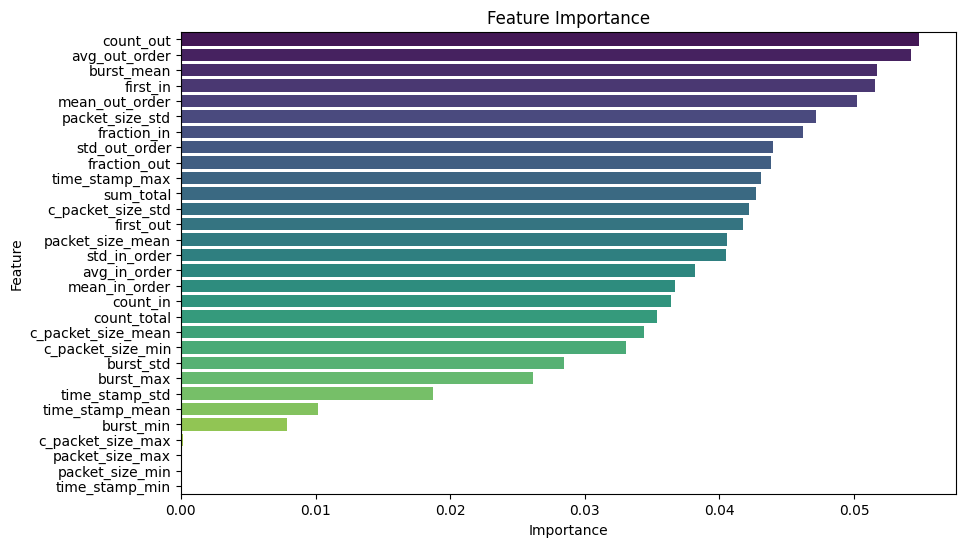

Selected Features: ['count_out', 'avg_out_order', 'burst_mean', 'first_in', 'mean_out_order', 'packet_size_std', 'fraction_in', 'std_out_order', 'fraction_out', 'time_stamp_max', 'sum_total', 'c_packet_size_std', 'first_out', 'packet_size_mean', 'std_in_order', 'avg_in_order', 'mean_in_order', 'count_in', 'count_total', 'c_packet_size_mean', 'c_packet_size_min', 'burst_std', 'burst_max', 'time_stamp_std', 'time_stamp_mean']
Number of Selected Features: 25
Accuracy: 0.8147


In [31]:
# closed
print("closed")
closed_X = X_labels[:19000]
closed_y = y_labels[:19000]
closed_X, closed_y = sortFeatureImportance(closed_X, closed_y)

open_multi


/var/folders/s1/nf_zq41n2nd447kv5d44gx2h0000gn/T/ipykernel_10446/1220244261.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


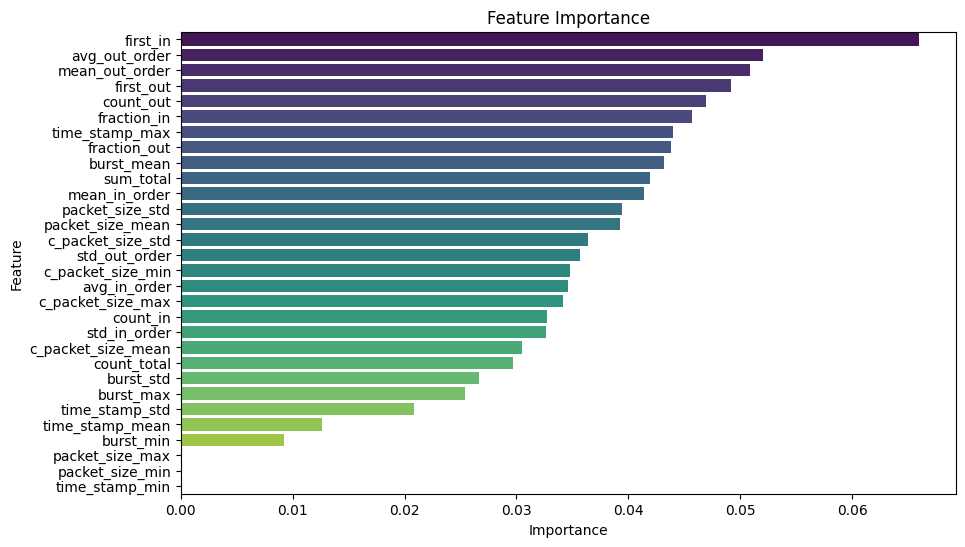

Selected Features: ['first_in', 'avg_out_order', 'mean_out_order', 'first_out', 'count_out', 'fraction_in', 'time_stamp_max', 'fraction_out', 'burst_mean', 'sum_total', 'mean_in_order', 'packet_size_std', 'packet_size_mean', 'c_packet_size_std', 'std_out_order', 'c_packet_size_min', 'avg_in_order', 'c_packet_size_max', 'count_in', 'std_in_order', 'c_packet_size_mean', 'count_total', 'burst_std', 'burst_max', 'time_stamp_std', 'time_stamp_mean']
Number of Selected Features: 26
Accuracy: 0.8103


In [32]:
# open_multi
print("open_multi")
open_multi_X = X_labels
open_multi_y = y_labels
open_multi_X, open_multi_y = sortFeatureImportance(open_multi_X, open_multi_y)

open_bi


/var/folders/s1/nf_zq41n2nd447kv5d44gx2h0000gn/T/ipykernel_10446/1220244261.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


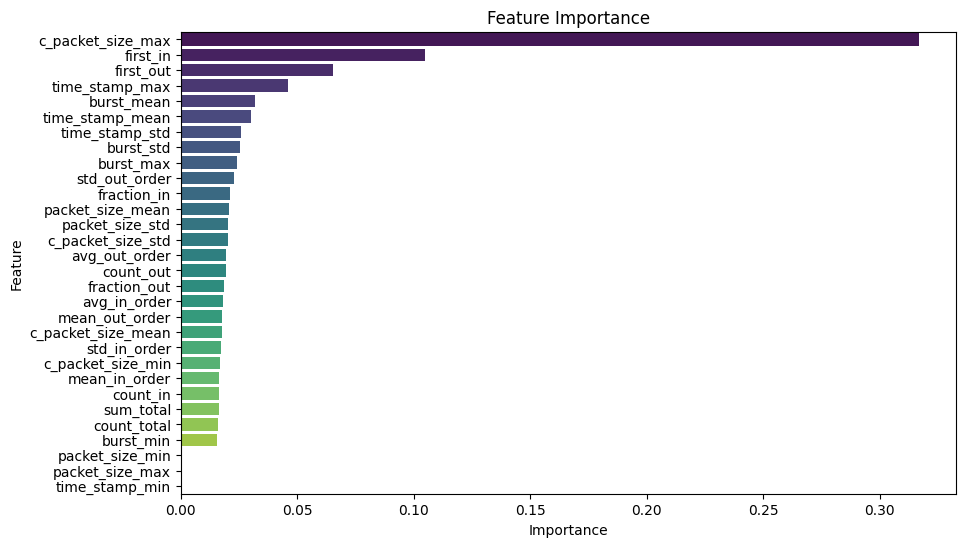

Selected Features: ['c_packet_size_max', 'first_in', 'first_out', 'time_stamp_max', 'burst_mean', 'time_stamp_mean', 'time_stamp_std', 'burst_std', 'burst_max', 'std_out_order', 'fraction_in', 'packet_size_mean', 'packet_size_std', 'c_packet_size_std', 'avg_out_order', 'count_out', 'fraction_out', 'avg_in_order', 'mean_out_order', 'c_packet_size_mean', 'std_in_order', 'c_packet_size_min', 'mean_in_order', 'count_in', 'sum_total', 'count_total', 'burst_min']
Number of Selected Features: 27
Accuracy: 0.9197


In [33]:
# open_multi
print("open_bi")
open_bi_X = X_labels
open_bi_y = y_labels.copy()
open_bi_y['web_site'] = open_bi_y['web_site'].apply(lambda x: 1 if x >= 0 else -1)
open_bi_X, open_bi_y = sortFeatureImportance(open_bi_X, open_bi_y)

### Finding the optimal number of features

In [34]:
import warnings
from sklearn.exceptions import DataConversionWarning

def findOptNum(option):
    print(option)
    feature_len = X = y = 0
    accuracies = []
    if option == "open_multi": 
        feature_len = len(open_multi_X.columns)
        X = open_multi_X
        y = open_multi_y
    elif option == "open_bi":
        feature_len = len(open_bi_X.columns)
        X = open_bi_X
        y = open_bi_y
    elif option == "closed":
        feature_len = len(closed_X.columns)
        X = closed_X
        y = closed_y

    for n in range(1, feature_len):
        warnings.simplefilter("ignore", category=DataConversionWarning)
        selected_features = X.iloc[:, :n]
     
        X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        accuracies.append(accuracy)

        print(f"Number of features: {n}, Accuracy: {accuracy:.4f}")    

    feature_counts = list(range(1, feature_len))

    plt.plot(feature_counts, accuracies, marker='o')
    plt.title('RF acccuracy according to Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.show()  

closed
Number of features: 1, Accuracy: 0.1213
Number of features: 2, Accuracy: 0.3137
Number of features: 3, Accuracy: 0.5221
Number of features: 4, Accuracy: 0.6374
Number of features: 5, Accuracy: 0.6321
Number of features: 6, Accuracy: 0.6984
Number of features: 7, Accuracy: 0.6971
Number of features: 8, Accuracy: 0.7497
Number of features: 9, Accuracy: 0.7439
Number of features: 10, Accuracy: 0.7679
Number of features: 11, Accuracy: 0.7824
Number of features: 12, Accuracy: 0.7895
Number of features: 13, Accuracy: 0.7832
Number of features: 14, Accuracy: 0.7758
Number of features: 15, Accuracy: 0.7829
Number of features: 16, Accuracy: 0.7818
Number of features: 17, Accuracy: 0.7824
Number of features: 18, Accuracy: 0.7861
Number of features: 19, Accuracy: 0.7832
Number of features: 20, Accuracy: 0.7842
Number of features: 21, Accuracy: 0.7845
Number of features: 22, Accuracy: 0.7874
Number of features: 23, Accuracy: 0.7989
Number of features: 24, Accuracy: 0.8042


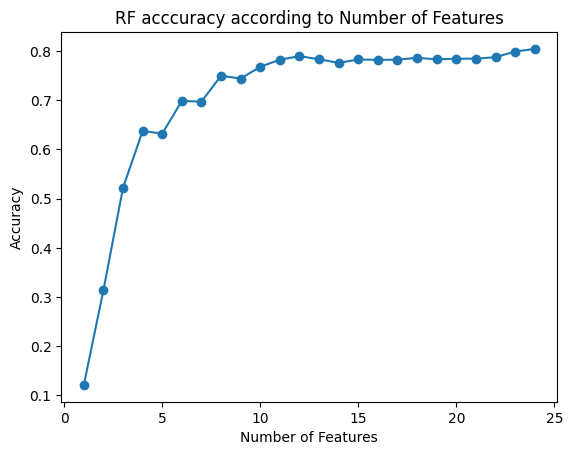

In [35]:
findOptNum("closed")

open_multi
Number of features: 1, Accuracy: 0.3409
Number of features: 2, Accuracy: 0.2736
Number of features: 3, Accuracy: 0.2750
Number of features: 4, Accuracy: 0.2731
Number of features: 5, Accuracy: 0.4943
Number of features: 6, Accuracy: 0.6317
Number of features: 7, Accuracy: 0.6862
Number of features: 8, Accuracy: 0.6876
Number of features: 9, Accuracy: 0.7155
Number of features: 10, Accuracy: 0.7474
Number of features: 11, Accuracy: 0.7555
Number of features: 12, Accuracy: 0.7457
Number of features: 13, Accuracy: 0.7460
Number of features: 14, Accuracy: 0.7552
Number of features: 15, Accuracy: 0.7691
Number of features: 16, Accuracy: 0.7645
Number of features: 17, Accuracy: 0.7691
Number of features: 18, Accuracy: 0.8003
Number of features: 19, Accuracy: 0.7993
Number of features: 20, Accuracy: 0.8000
Number of features: 21, Accuracy: 0.7991
Number of features: 22, Accuracy: 0.7988
Number of features: 23, Accuracy: 0.8064
Number of features: 24, Accuracy: 0.8133
Number of feat

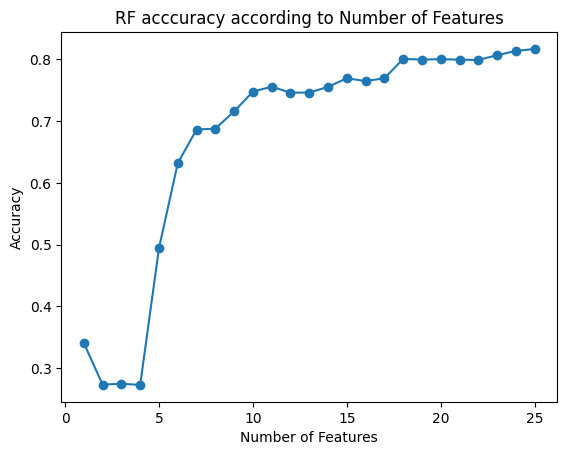

In [36]:
findOptNum("open_multi")

open_bi
Number of features: 1, Accuracy: 0.8634
Number of features: 2, Accuracy: 0.8693
Number of features: 3, Accuracy: 0.8693
Number of features: 4, Accuracy: 0.8340
Number of features: 5, Accuracy: 0.8647
Number of features: 6, Accuracy: 0.8836
Number of features: 7, Accuracy: 0.8926
Number of features: 8, Accuracy: 0.8948
Number of features: 9, Accuracy: 0.8974
Number of features: 10, Accuracy: 0.9072
Number of features: 11, Accuracy: 0.9110
Number of features: 12, Accuracy: 0.9107
Number of features: 13, Accuracy: 0.9114
Number of features: 14, Accuracy: 0.9136
Number of features: 15, Accuracy: 0.9162
Number of features: 16, Accuracy: 0.9155
Number of features: 17, Accuracy: 0.9188
Number of features: 18, Accuracy: 0.9176
Number of features: 19, Accuracy: 0.9197
Number of features: 20, Accuracy: 0.9195
Number of features: 21, Accuracy: 0.9197
Number of features: 22, Accuracy: 0.9209
Number of features: 23, Accuracy: 0.9195
Number of features: 24, Accuracy: 0.9207
Number of feature

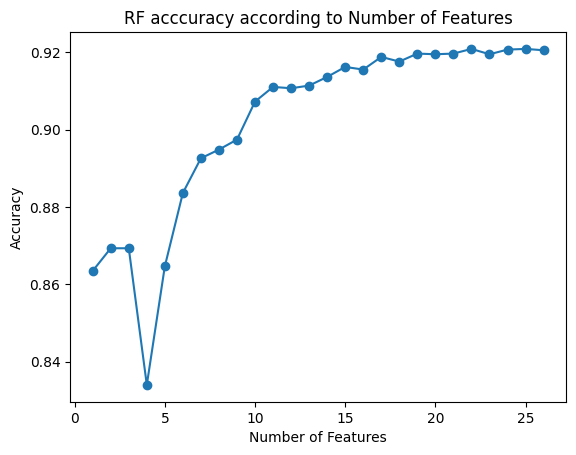

In [37]:
findOptNum("open_bi")

### save dataframe as csv

In [38]:
# # open_multi
# open_multi_X.to_csv("./csv/open_multi/open_multi_data.csv", index=False)
# open_multi_y.to_csv("./csv/open_multi/open_multi_target.csv", index=False)

In [39]:
# closed
# closed_X.to_csv("./csv/closed/closed_data.csv", index=False)
# closed_y.to_csv("./csv/closed/closed_target.csv", index=False)

In [40]:
# # open_binary
# open_bi_X.to_csv("./csv/open_bi/open_bi_data.csv", index=False)
# open_bi_y.to_csv("./csv/open_bi/open_bi_target.csv", index=False)